# Proyecto Final - Grupo #1
## Integrantes
- Darlyn Bravo Peña
- Joel Gabriel Torrejon
- Giovani Vega
- Brandon Jason Valle Tamayo

## Libs to use

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score, f1_score
from sklearn.feature_selection import f_classif

## Carga de Dataset

In [9]:
group_1_df = pd.read_csv('files/GRUPO 1_1.csv', delimiter = "|")
working_columns = [f"V{i+1}" for i in range(30)]
df_numeric = group_1_df.select_dtypes(include=['number'])[working_columns]

## Generalidades del Dataset

In [10]:
group_1_df.head()

,ALEAT,ID,OBJ,V1,V2,V3,V4,V5,V6,V7,...,V22_P,V23_P,V24_P,V25_P,V26_P,V27_P,V28_P,V29_P,V30_P,V31_P.1
0,0.000011,279403833,NO,0.00000,0.000000,0.0,11.991000,0.253845,0.000000,0.000000,...,0.000000,0.026359,0.282127,0.000000,0.0,0.0,0.000000,0.507707,0.0,0.000577
1,0.000021,278970977,NO,0.02043,6.621791,0.0,1.545208,116.968217,19.232067,0.000000,...,0.000007,0.201098,0.016155,0.000014,0.0,0.0,0.000000,0.741277,0.0,0.000690
2,0.000034,266714141,NO,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.117024,0.696280,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.000036,278047301,NO,0.00000,0.039873,0.0,0.225174,84.001848,0.104324,0.000000,...,0.000028,0.090584,0.042693,0.000000,0.0,0.0,0.000000,0.706128,0.0,0.004855
4,0.000045,334324292,NO,0.00000,5.223464,0.0,131.933357,130.280795,3.020154,0.044157,...,0.000180,0.257948,0.134969,0.000003,0.0,0.0,0.000965,0.397722,0.0,0.017215


In [5]:
print(group_1_df.shape)
group_1_df.dtypes

(10000, 66)


ALEAT      float64
ID           int64
OBJ         object
V1         float64
V2         float64
            ...   
V27_P      float64
V28_P      float64
V29_P      float64
V30_P      float64
V31_P.1    float64
Length: 66, dtype: object

In [8]:
group_1_df.describe()

,ALEAT,ID,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.029344,2.816031e+08,261.039200,124.314067,0.953652,169.008322,281.740473,3.211213,1.618930,0.011950,...,209.975400,18.103871,3441.336091,1562.573547,10.384319,0.511318,9.377279,1.688439,9960.252040,6.488413
std,0.017098,3.414150e+08,1058.929785,786.846001,28.051622,979.155195,1189.587221,8.988382,18.507076,0.183108,...,791.828675,128.522607,7896.907228,3586.423106,110.448810,6.568766,624.332156,9.399634,19976.762047,245.461237
min,0.000011,2.158800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014511,2.659602e+08,0.000000,0.000000,0.000000,0.335424,5.548826,0.046440,0.000000,0.000000,...,10.597058,0.000000,57.999321,168.175352,0.000000,0.000000,0.000000,0.000000,627.202158,0.000000
50%,0.029280,2.735794e+08,0.000000,0.295540,0.000000,6.189753,31.308841,0.480831,0.000000,0.000000,...,44.585142,0.304189,383.553319,599.064787,0.012030,0.000000,0.000000,0.000000,2639.754585,0.000000
75%,0.044246,2.788863e+08,15.531321,13.766102,0.000000,51.979846,149.541211,2.512911,0.000000,0.000000,...,162.041389,3.662268,2550.391607,1644.525635,0.252591,0.000000,0.000000,0.000000,9055.486017,0.000000
max,0.058759,5.080900e+09,25628.988899,32962.461093,2228.616420,62724.729745,55157.305829,279.450335,694.292589,9.814952,...,49167.459499,7986.945888,176673.900078,199808.805101,6306.175168,413.849357,59128.115880,222.872718,523688.791357,18197.115980


## Exploratory Dana Analysis - ANOVA

/opt/conda/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


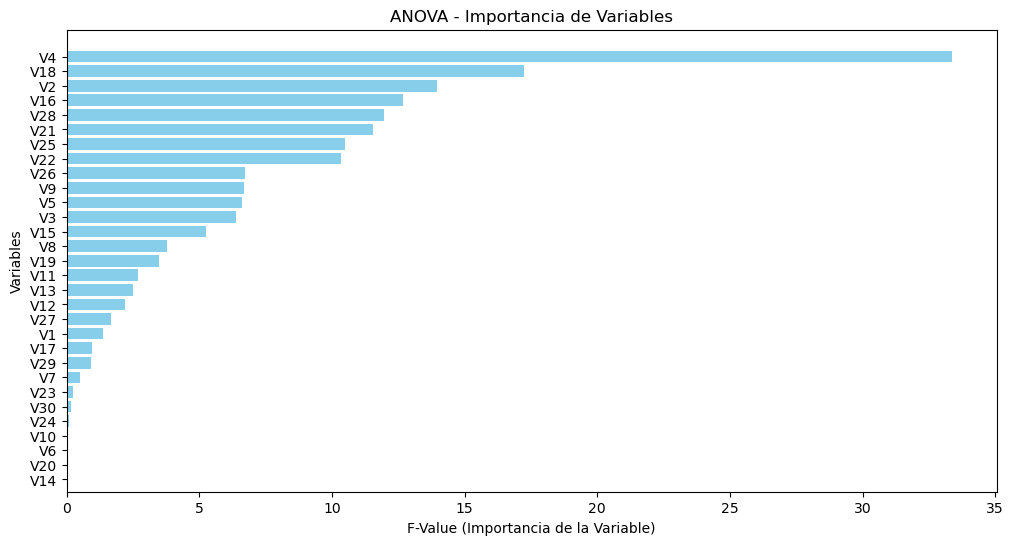

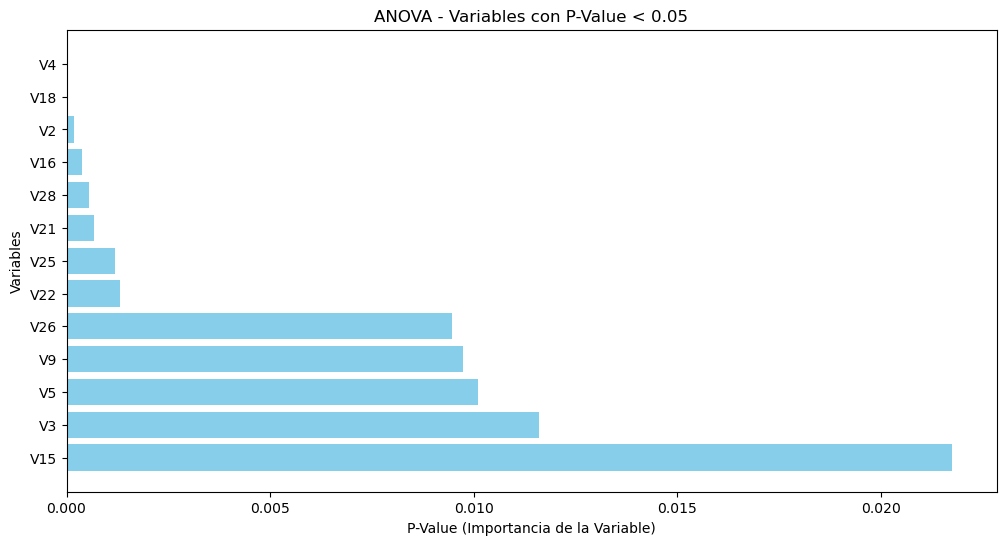

['V4', 'V18', 'V2', 'V16', 'V28', 'V21', 'V25', 'V22', 'V26', 'V9', 'V5', 'V3', 'V15']


In [ ]:
# Aplicar ANOVA F-test
f_values, p_values = f_classif(df_numeric, group_1_df["OBJ"])

anova_results = pd.DataFrame({"Variable": df_numeric.columns.to_list(), "F-Value": f_values, "P-Value": p_values})
anova_results.sort_values(by="P-Value", ascending=True, inplace=True)

# Graficar los valores F en orden descendente
plt.figure(figsize=(12, 6))
plt.barh(anova_results["Variable"], anova_results["F-Value"], color='skyblue')
plt.xlabel("F-Value (Importancia de la Variable)")
plt.ylabel("Variables")
plt.title("ANOVA - Importancia de Variables")
plt.gca().invert_yaxis()
plt.show()

# Filtrar solo las variables con p-value < 0.05
anova_results_filtered = anova_results[anova_results["P-Value"] < 0.05]

# Graficar solo las variables significativas
plt.figure(figsize=(12, 6))
plt.barh(anova_results_filtered["Variable"], anova_results_filtered["P-Value"], color='skyblue')
plt.xlabel("P-Value (Importancia de la Variable)")
plt.ylabel("Variables")
plt.title("ANOVA - Variables con P-Value < 0.05")
plt.gca().invert_yaxis()  # Invertir el eje Y para mejor visualización
plt.show()

In [17]:
working_columns = anova_results_filtered["Variable"].to_list()
df_numeric = df_numeric[working_columns]
df_numeric.head()

,V4,V18,V2,V16,V28,V21,V25,V22,V26,V9,V5,V3,V15
0,11.991000,143.987335,0.000000,0.689762,0.000000,7.644041,0.000000,0.000000,0.0,1.343712,0.253845,0.0,0.0
1,1.545208,446.648812,6.621791,7.773514,0.000000,177.410416,0.928695,0.464984,0.0,656.503910,116.968217,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,0.225174,142.371723,0.039873,2.015115,0.000000,80.590325,0.000000,0.115759,0.0,19.300749,84.001848,0.0,0.0
4,131.933357,78.795954,5.223464,2.705910,7.781566,83.448735,0.025015,1.447770,0.0,3.038757,130.280795,0.0,0.0


## Exploratory Data Analysis - Univariado

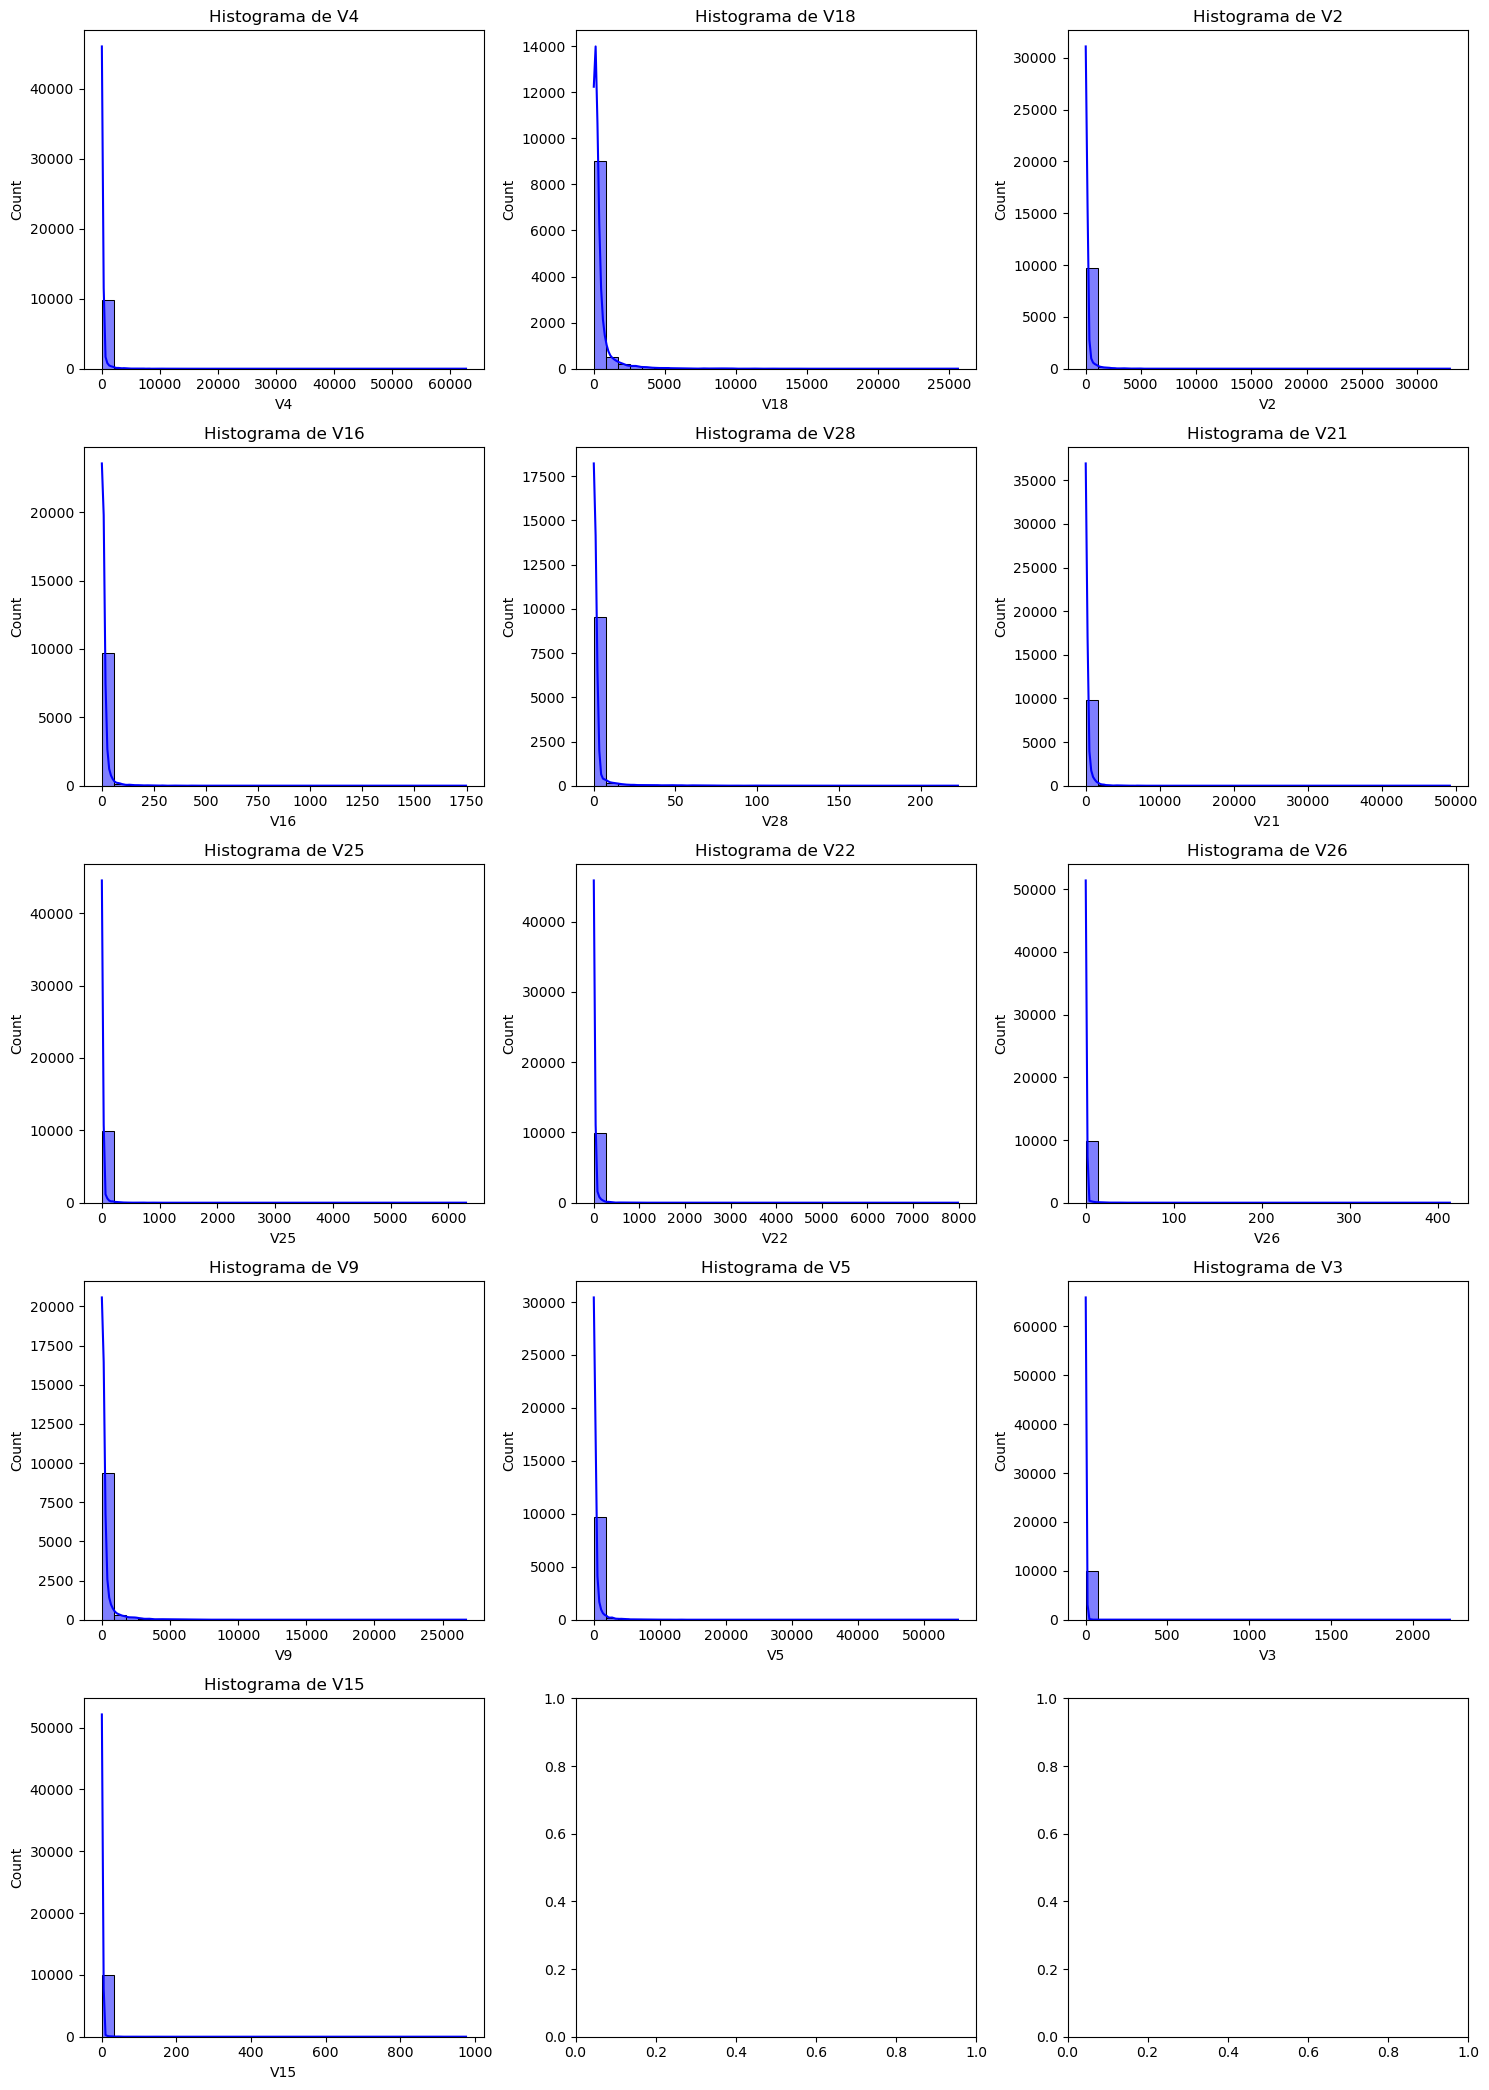

In [18]:
# Número de columnas
num_cols = len(df_numeric.columns)

fig, axes = plt.subplots(nrows=int(np.ceil(num_cols/3)), ncols=3, figsize=(15, 5*num_cols//3))
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.histplot(df_numeric[col], kde=True, bins=30, color="blue", ax=axes[i])
    axes[i].set_title(f"Histograma de {col}")

# Ajustar diseño
plt.tight_layout()
plt.show()

### Barras Categoricas

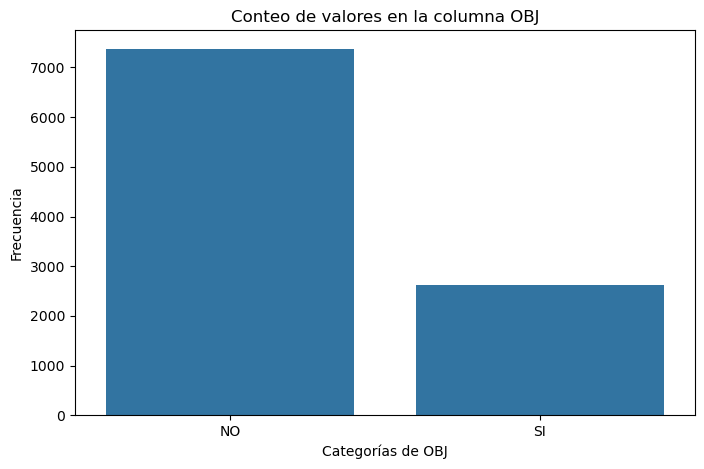

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x=group_1_df["OBJ"])

# Etiquetas y título
plt.xlabel("Categorías de OBJ")
plt.ylabel("Frecuencia")
plt.title("Conteo de valores en la columna OBJ")
plt.show()


### Boxplot Categorías

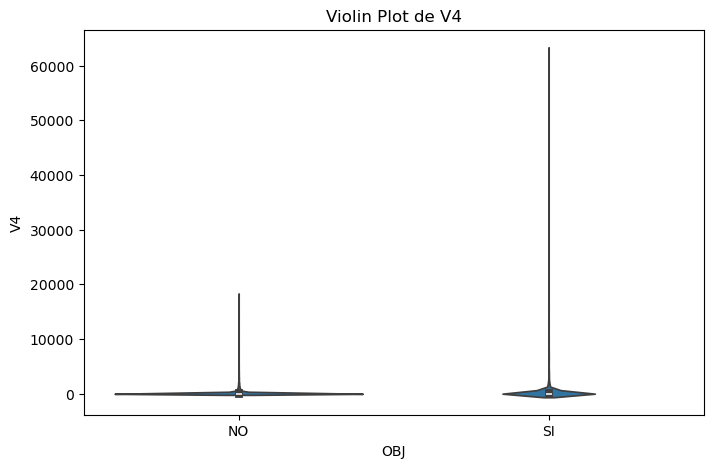

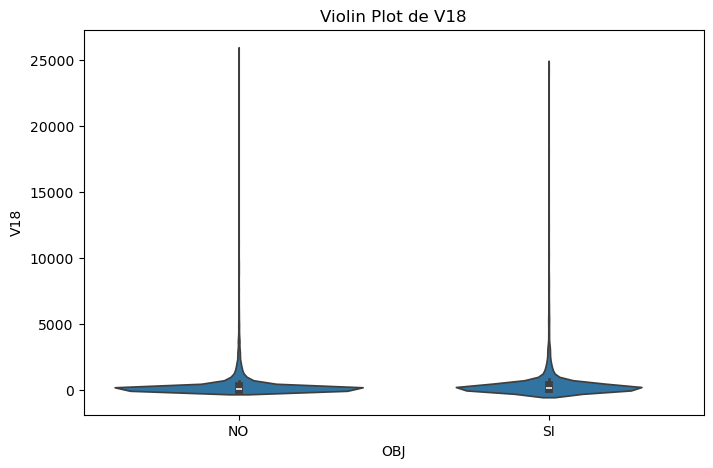

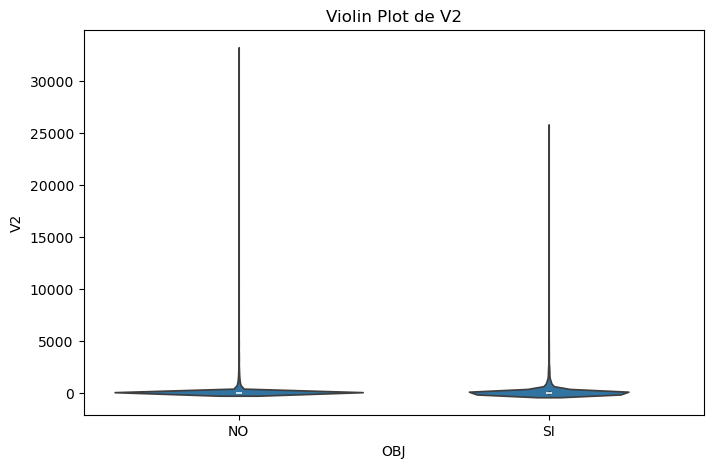

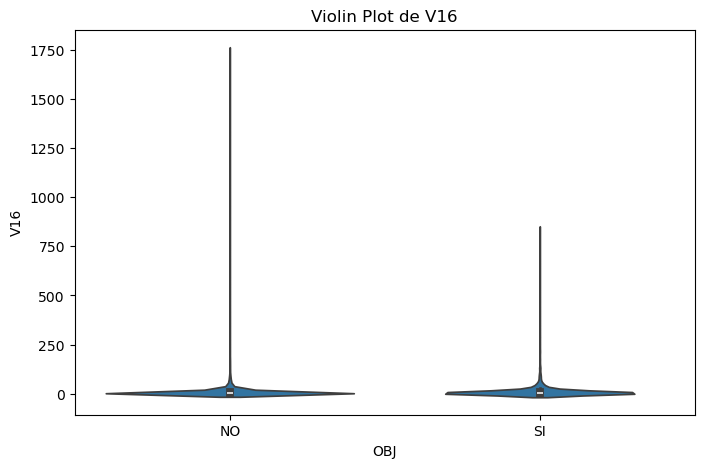

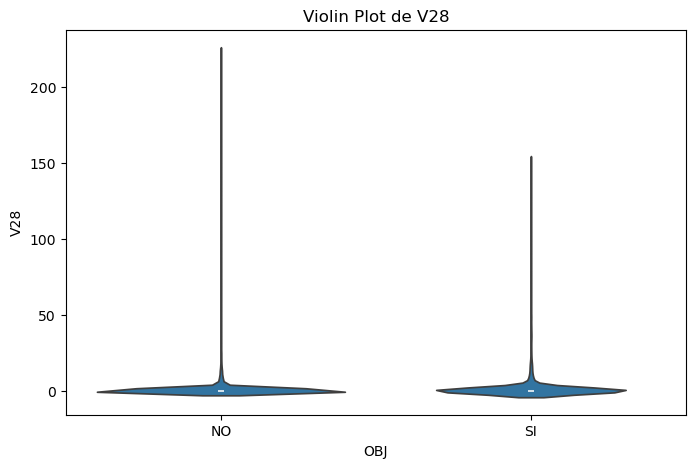

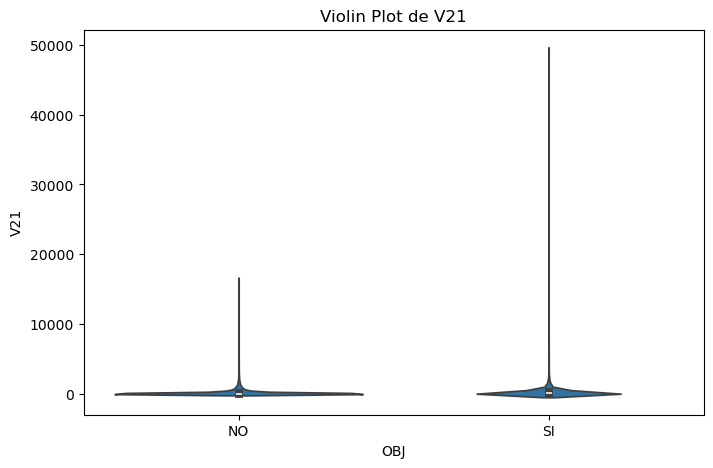

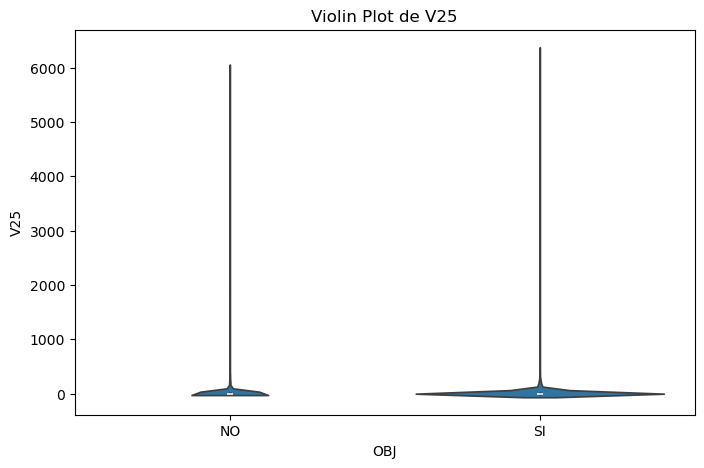

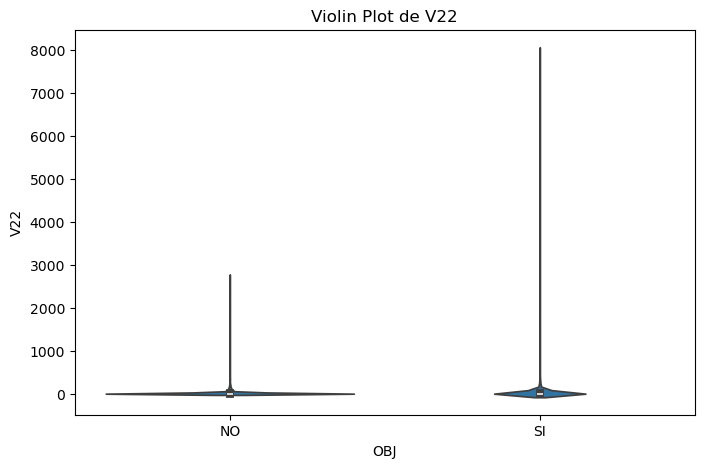

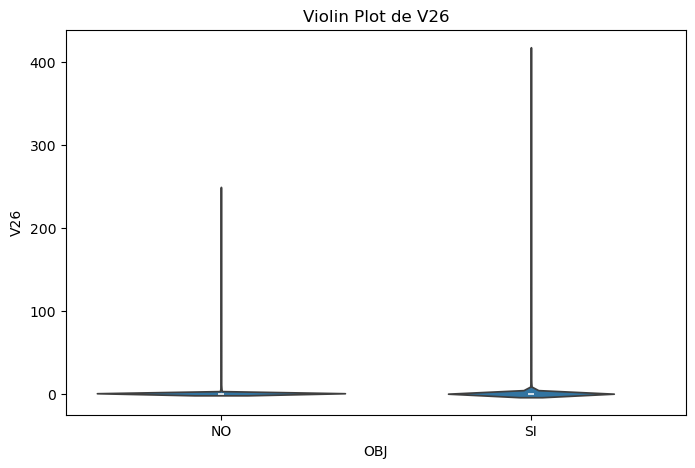

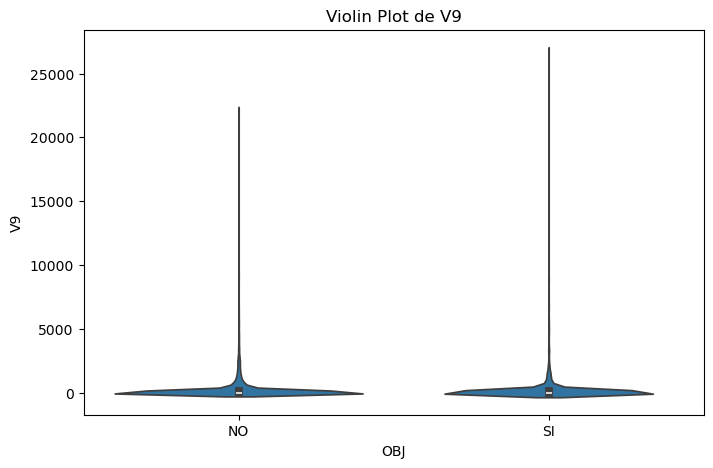

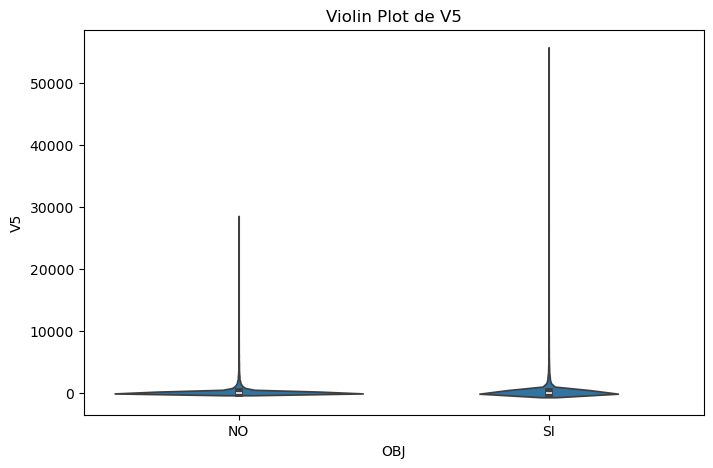

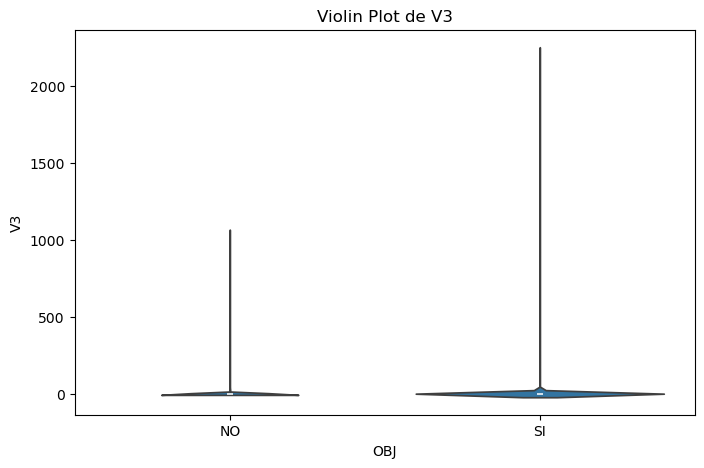

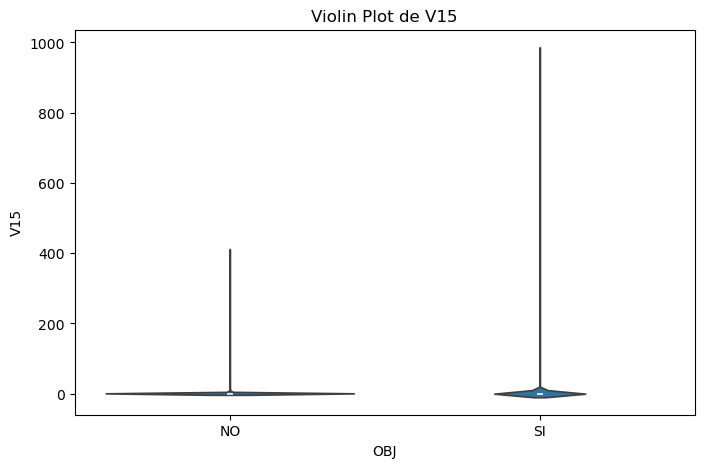

In [22]:
# Crear boxplots y violin plots para todas las columnas numéricas
for col in df_numeric.columns:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=group_1_df['OBJ'], y=df_numeric[col])
    plt.title(f"Violin Plot de {col}")
    plt.show()

## EDA - Multivariable

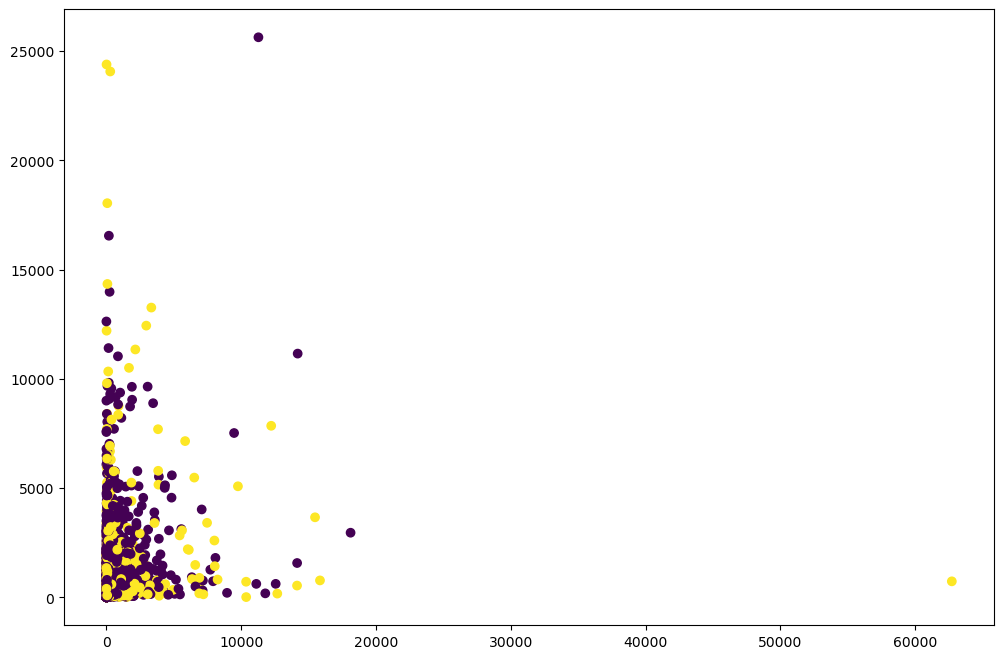

In [23]:
plt.figure(figsize=(12, 8))
y_df = group_1_df["OBJ"].map({"NO": 0, "SI": 1})
plt.scatter(df_numeric["V4"], df_numeric["V18"], c=y_df)
plt.show()

### Correlacion de Variables

<Figure size 1200x800 with 0 Axes>

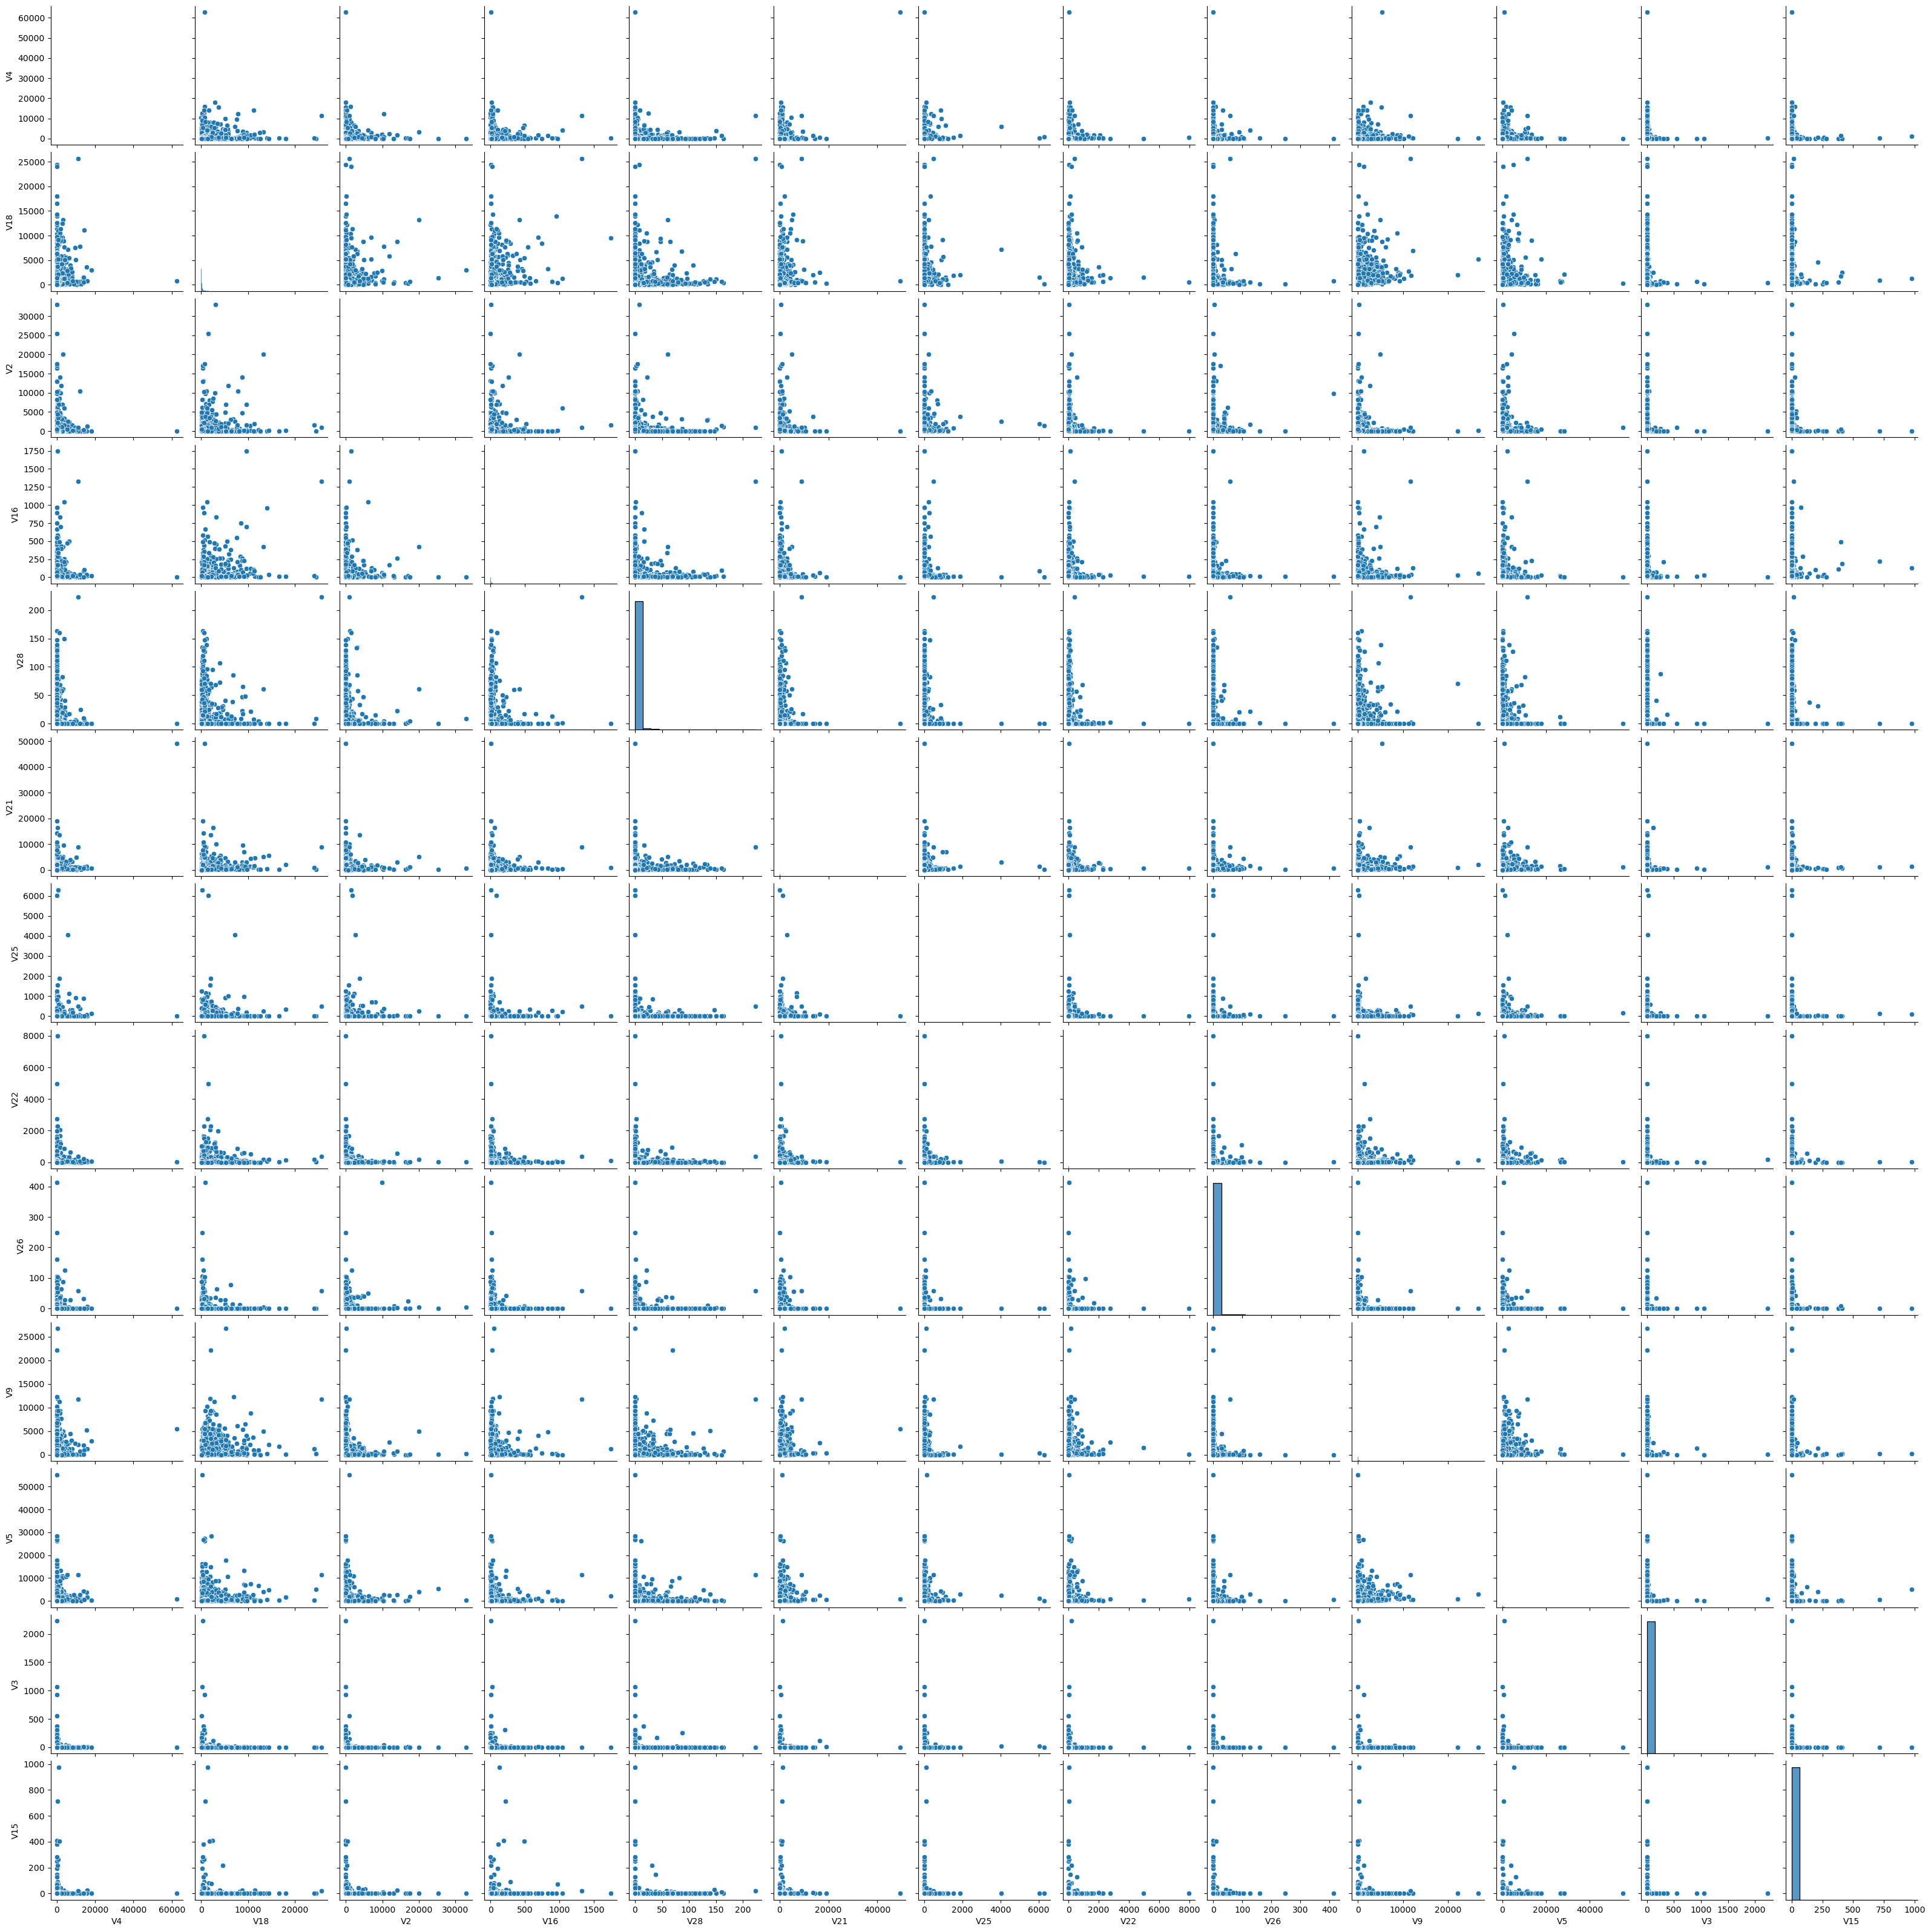

In [27]:
plt.figure(figsize=(12, 8))
sns.pairplot(df_numeric)
plt.show()

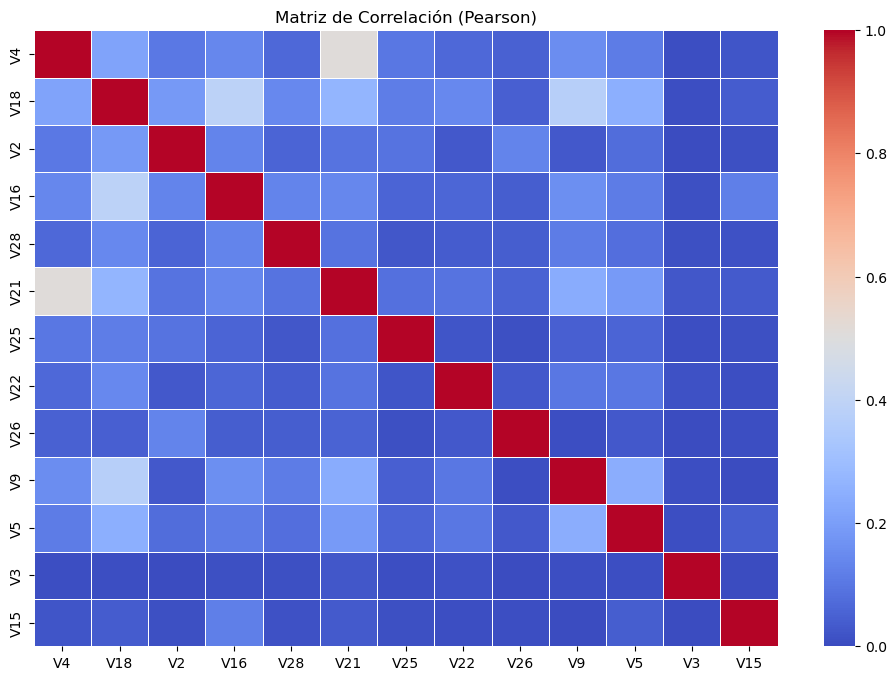

In [24]:
correlation_matrix = df_numeric.corr(method="pearson")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

# Etiquetas y título
plt.title("Matriz de Correlación (Pearson)")

# Mostrar gráfico
plt.show()

## Resumen - EDA
- Vemos que las variables V1 hasta V30 tienen un sesgo a la derecha
- Tienen una dispersión alta y muchos outliers en casi todas las variables numericas
- La distribución y las dimensiones son diferentes, habría que ver la necesidad de normalizar.
- La variable objetivo "OBJ" no está balanceada entonces podemos caer en un sesgo para los valores "NO" a diferencia de "SI"

## Normalizacion

In [ ]:
from sklearn.preprocessing import StandardScaler
z_core_scaler = StandardScaler()
X_df = pd.DataFrame(z_core_scaler.fit_transform(df_numeric), columns=df_numeric.columns)
X_df.head()

y_df = group_1_df["OBJ"].map({"NO": 0, "SI": 1})

,V4,V18,V2,V16,V28,V21,V25,V22,V26,V9,V5,V3,V15
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.705303e-17,-1.989520e-17,1.705303e-17,-2.842171e-17,2.629008e-17,4.476419e-17,8.171241e-18,1.492140e-17,1.705303e-17,-7.815970e-18,4.263256e-18,-5.506706e-18,-8.171241e-18
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.726149e-01,-3.821802e-01,-1.579982e-01,-2.511926e-01,-1.796372e-01,-2.651911e-01,-9.402399e-02,-1.408684e-01,-7.784471e-02,-2.935207e-01,-2.368507e-01,-3.399804e-02,-4.954693e-02
25%,-1.722723e-01,-3.375360e-01,-1.579982e-01,-2.360122e-01,-1.796372e-01,-2.518074e-01,-9.402399e-02,-1.408684e-01,-7.784471e-02,-2.919418e-01,-2.321860e-01,-3.399804e-02,-4.954693e-02
50%,-1.662931e-01,-2.617170e-01,-1.576226e-01,-1.889850e-01,-1.796372e-01,-2.088817e-01,-9.391507e-02,-1.385015e-01,-7.784471e-02,-2.693885e-01,-2.105303e-01,-3.399804e-02,-4.954693e-02
75%,-1.195258e-01,-7.032411e-02,-1.405021e-01,-5.383320e-02,-1.796372e-01,-6.053886e-02,-9.173693e-02,-1.123719e-01,-7.784471e-02,-1.423573e-01,-1.111359e-01,-3.399804e-02,-4.954693e-02
max,6.389064e+01,2.417584e+01,4.173598e+01,3.921578e+01,2.353234e+01,6.183147e+01,5.700474e+01,6.200653e+01,6.292791e+01,3.202948e+01,4.613223e+01,7.941695e+01,6.363306e+01


## Separacion de Set de Datos

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42, stratify=y_df)

## Entrenamiento de Modelos

In [29]:
scores = ('precision', 'recall', 'f1', 'roc_auc', 'accuracy')
score_response = []
confution_matrix_responses = {}

### KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Estandariza los datos (importante para KNN)
    ("knn", KNeighborsClassifier())  # Modelo KNN
])

param_grid = {
    "knn__weights": ["uniform", "distance"],
    "knn__n_neighbors": [3, 5, 7, 9, 11],
    "knn__metric": ["euclidean", "manhattan", "minkowski"],
    "knn__p": [1,2],
}

for i, eval_metric in enumerate(scores):
    grid_clas_p = GridSearchCV(pipeline, param_grid=param_grid, scoring=eval_metric, cv=10, n_jobs=-1)
    grid_clas_p.fit(X_train, y_train)
    score_response.append({
        'model': 'knn',
        'score_metric_name': eval_metric,
        'score_metric_value': grid_clas_p.best_score_,
    })
    best_model = grid_clas_p.best_estimator_
    
    y_pred = best_model.predict(X_test)
    cm_knn = confusion_matrix(y_test, y_pred)
    confution_matrix_responses['knn'] = cm_knn

print(score_response)


[{'model': 'knn', 'score_metric_name': 'precision', 'score_metric_value': 0.3441495837275011}, {'model': 'knn', 'score_metric_name': 'recall', 'score_metric_value': 0.2000159489633174}, {'model': 'knn', 'score_metric_name': 'f1', 'score_metric_value': 0.2346625620056017}, {'model': 'knn', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5467055909113354}, {'model': 'knn', 'score_metric_name': 'accuracy', 'score_metric_value': 0.7196250000000001}, {'model': 'svc', 'score_metric_name': 'precision', 'score_metric_value': 0.4037456445993031}, {'model': 'svc', 'score_metric_name': 'recall', 'score_metric_value': 0.2978561976421181}, {'model': 'svc', 'score_metric_name': 'f1', 'score_metric_value': 0.32593014302331297}, {'model': 'svc', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5959581181260498}, {'model': 'svc', 'score_metric_name': 'accuracy', 'score_metric_value': 0.734125}, {'model': 'xg', 'score_metric_name': 'precision', 'score_metric_value': 0.5522058823529412}, {

### SVC (Support Vector Machine)

In [35]:
from sklearn.svm import SVC

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ["poly", "rbf"],
    "svc__degree": [2, 3, 4],
    "svc__class_weight": ["balanced"],
}

for i, eval_metric in enumerate(scores):
    grid_clas_p = GridSearchCV(pipeline, param_grid=param_grid, scoring=eval_metric, cv=2, n_jobs=-1)
    grid_clas_p.fit(X_train, y_train)
    score_response.append({
        'model': 'svc',
        'score_metric_name': eval_metric,
        'score_metric_value': grid_clas_p.best_score_,
    })
    best_model = grid_clas_p.best_estimator_
    y_pred = best_model.predict(X_test)
    cm_svc = confusion_matrix(y_test, y_pred)
    confution_matrix_responses['svc'] = cm_svc

print(score_response)


[{'model': 'knn', 'score_metric_name': 'precision', 'score_metric_value': 0.3441495837275011}, {'model': 'knn', 'score_metric_name': 'recall', 'score_metric_value': 0.2000159489633174}, {'model': 'knn', 'score_metric_name': 'f1', 'score_metric_value': 0.2346625620056017}, {'model': 'knn', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5467055909113354}, {'model': 'knn', 'score_metric_name': 'accuracy', 'score_metric_value': 0.7196250000000001}, {'model': 'svc', 'score_metric_name': 'precision', 'score_metric_value': 0.4037456445993031}, {'model': 'svc', 'score_metric_name': 'recall', 'score_metric_value': 0.2978561976421181}, {'model': 'svc', 'score_metric_name': 'f1', 'score_metric_value': 0.32593014302331297}, {'model': 'svc', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5959581181260498}, {'model': 'svc', 'score_metric_name': 'accuracy', 'score_metric_value': 0.734125}]


### XGBooster

In [36]:
!pip install xgboost

In [ ]:

import xgboost as xgb

pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Normalizar datos
    ("xgb", xgb.XGBClassifier())  # Modelo XGBoost
])

param_grid = {
    "xgb__n_estimators": [30, 50, 100],  # Número de árboles
    "xgb__max_depth": [3, 5, 7],  # Profundidad de los árboles
    "xgb__learning_rate": [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    "xgb__subsample": [0.7, 0.8, 1.0],  # Fracción de datos usados en cada iteración
    "xgb__gamma": [0, 0.1, 0.2],  # Regularización para evitar sobreajuste
    "xgb__scale_pos_weight": [1, 3, 5],  # balanced
    "xgb__objective": ["binary:logistic"],  # balanced
}

for i, eval_metric in enumerate(scores):
    grid_clas_p = GridSearchCV(pipeline, param_grid=param_grid, scoring=eval_metric, cv=5, n_jobs=-1)
    grid_clas_p.fit(X_train, y_train)
    score_response.append({
        'model': 'xg',
        'score_metric_name': eval_metric,
        'score_metric_value': grid_clas_p.best_score_,
    })
    best_model = grid_clas_p.best_estimator_
    y_pred = best_model.predict(X_test)
    cm_svc = confusion_matrix(y_test, y_pred)
    confution_matrix_responses['xg'] = cm_svc

print(score_response)


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.p

[{'model': 'knn', 'score_metric_name': 'precision', 'score_metric_value': 0.3441495837275011}, {'model': 'knn', 'score_metric_name': 'recall', 'score_metric_value': 0.2000159489633174}, {'model': 'knn', 'score_metric_name': 'f1', 'score_metric_value': 0.2346625620056017}, {'model': 'knn', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5467055909113354}, {'model': 'knn', 'score_metric_name': 'accuracy', 'score_metric_value': 0.7196250000000001}, {'model': 'svc', 'score_metric_name': 'precision', 'score_metric_value': 0.4037456445993031}, {'model': 'svc', 'score_metric_name': 'recall', 'score_metric_value': 0.2978561976421181}, {'model': 'svc', 'score_metric_name': 'f1', 'score_metric_value': 0.32593014302331297}, {'model': 'svc', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5959581181260498}, {'model': 'svc', 'score_metric_name': 'accuracy', 'score_metric_value': 0.734125}, {'model': 'xg', 'score_metric_name': 'precision', 'score_metric_value': 0.5522058823529412}, {

/opt/conda/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### Decision Tree

In [38]:

from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Normalizar datos
    ("tree", DecisionTreeClassifier())
])

param_grid = {
    "tree__criterion": ["entropy"],  # Función de impureza
    "tree__max_depth": [3, 5, 10],  # Profundidad máxima del árbol
    "tree__min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    "tree__min_samples_leaf": [1, 2, 5],  # Mínimo de muestras en una hoja
    "tree__ccp_alpha": [0.0, 0.01, 0.1],
    "tree__class_weight": ["balanced"]
}

for i, eval_metric in enumerate(scores):
    grid_clas_p = GridSearchCV(pipeline, param_grid=param_grid, scoring=eval_metric, cv=5, n_jobs=-1)
    grid_clas_p.fit(X_train, y_train)
    score_response.append({
        'model': 'tree',
        'score_metric_name': eval_metric,
        'score_metric_value': grid_clas_p.best_score_,
    })
    best_model = grid_clas_p.best_estimator_
    y_pred = best_model.predict(X_test)
    cm_svc = confusion_matrix(y_test, y_pred)
    confution_matrix_responses['tree'] = cm_svc

print(score_response)


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.p

[{'model': 'knn', 'score_metric_name': 'precision', 'score_metric_value': 0.3441495837275011}, {'model': 'knn', 'score_metric_name': 'recall', 'score_metric_value': 0.2000159489633174}, {'model': 'knn', 'score_metric_name': 'f1', 'score_metric_value': 0.2346625620056017}, {'model': 'knn', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5467055909113354}, {'model': 'knn', 'score_metric_name': 'accuracy', 'score_metric_value': 0.7196250000000001}, {'model': 'svc', 'score_metric_name': 'precision', 'score_metric_value': 0.4037456445993031}, {'model': 'svc', 'score_metric_name': 'recall', 'score_metric_value': 0.2978561976421181}, {'model': 'svc', 'score_metric_name': 'f1', 'score_metric_value': 0.32593014302331297}, {'model': 'svc', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5959581181260498}, {'model': 'svc', 'score_metric_name': 'accuracy', 'score_metric_value': 0.734125}, {'model': 'xg', 'score_metric_name': 'precision', 'score_metric_value': 0.5522058823529412}, {

### Logistic Regression

In [43]:

from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Normalizar datos
    ("log_reg", LogisticRegression())
])

param_grid = {
    "log_reg__max_iter": [1000],
    "log_reg__solver": ["liblinear"],
    "log_reg__class_weight": ["balanced"],
    "log_reg__class_weight": ["balanced"],
    'log_reg__C': [1, 5, 10, 15, 20],  # Valores de la regularización
    'log_reg__penalty': ['l1', 'l2']   # Tipos de penalización
}

for i, eval_metric in enumerate(scores):
    grid_clas_p = GridSearchCV(pipeline, param_grid=param_grid, scoring=eval_metric, cv=5, n_jobs=-1)
    grid_clas_p.fit(X_train, y_train)
    score_response.append({
        'model': 'log_reg',
        'score_metric_name': eval_metric,
        'score_metric_value': grid_clas_p.best_score_,
    })
    best_model = grid_clas_p.best_estimator_
    y_pred = best_model.predict(X_test)
    cm_svc = confusion_matrix(y_test, y_pred)
    confution_matrix_responses['log_reg'] = cm_svc

print(score_response)


/opt/conda/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[{'model': 'knn', 'score_metric_name': 'precision', 'score_metric_value': 0.3441495837275011}, {'model': 'knn', 'score_metric_name': 'recall', 'score_metric_value': 0.2000159489633174}, {'model': 'knn', 'score_metric_name': 'f1', 'score_metric_value': 0.2346625620056017}, {'model': 'knn', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5467055909113354}, {'model': 'knn', 'score_metric_name': 'accuracy', 'score_metric_value': 0.7196250000000001}, {'model': 'svc', 'score_metric_name': 'precision', 'score_metric_value': 0.4037456445993031}, {'model': 'svc', 'score_metric_name': 'recall', 'score_metric_value': 0.2978561976421181}, {'model': 'svc', 'score_metric_name': 'f1', 'score_metric_value': 0.32593014302331297}, {'model': 'svc', 'score_metric_name': 'roc_auc', 'score_metric_value': 0.5959581181260498}, {'model': 'svc', 'score_metric_name': 'accuracy', 'score_metric_value': 0.734125}, {'model': 'xg', 'score_metric_name': 'precision', 'score_metric_value': 0.5522058823529412}, {

### Confusion Matrix

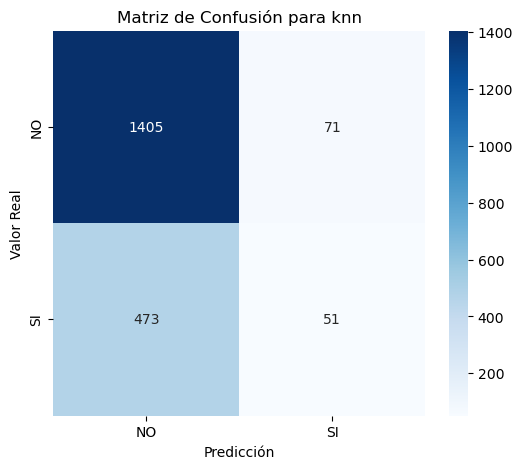

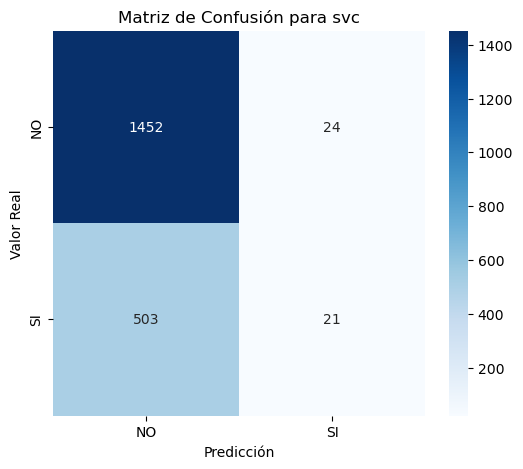

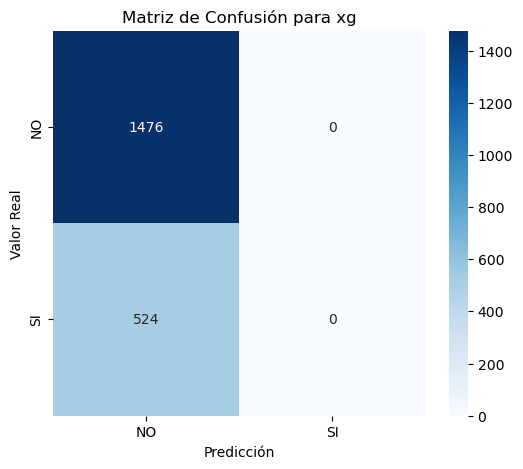

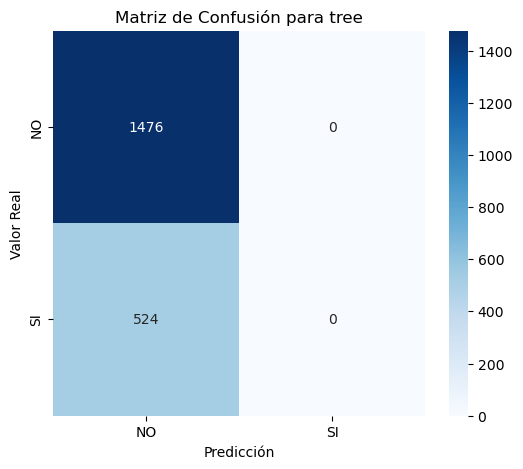

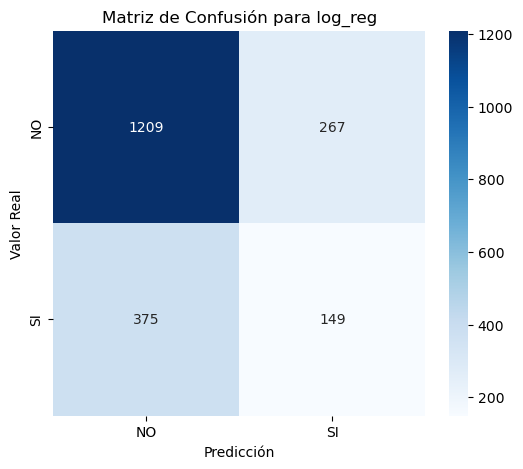

In [44]:
# Visualizar la matriz de confusión
for model, current_matrix in confution_matrix_responses.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(current_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["NO", "SI"], yticklabels=["NO", "SI"])
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.title(f"Matriz de Confusión para {model}")
    plt.show()

### Best Scores

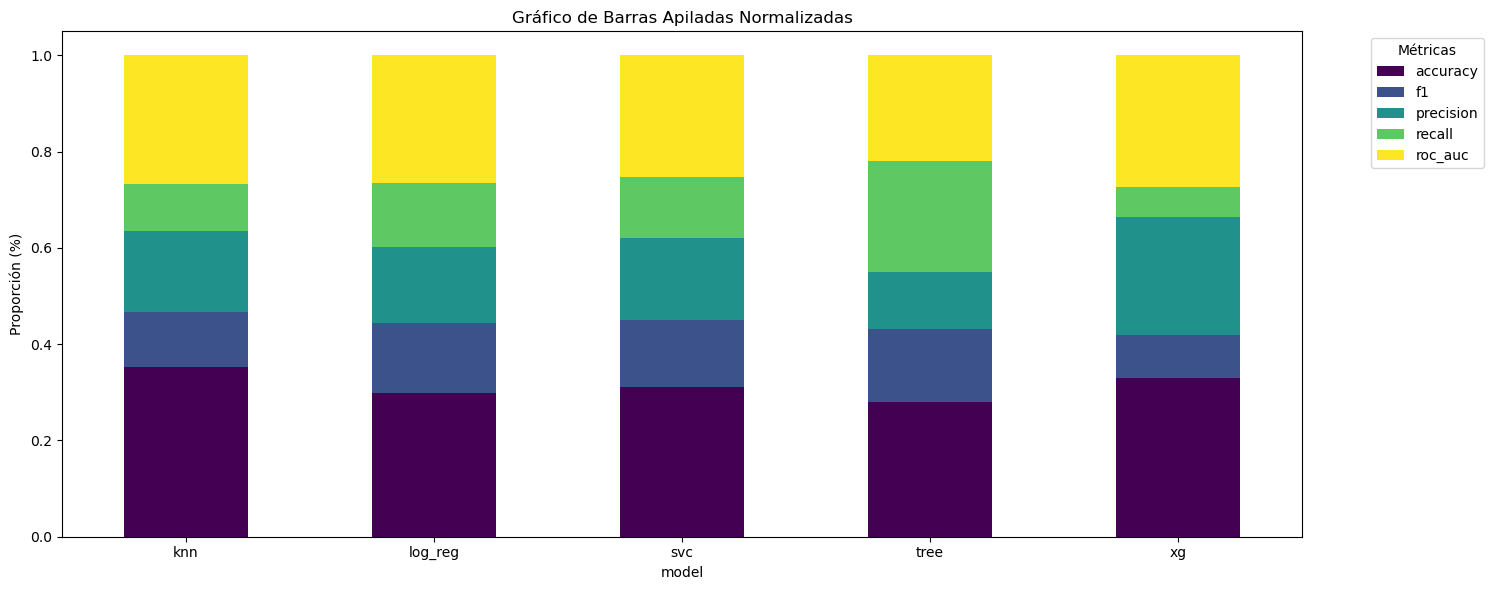

In [62]:
df_best_score_responses = pd.DataFrame(score_response)

df_pivot = pd.crosstab(df_best_score_responses["model"], df_best_score_responses["score_metric_name"], values=df_best_score_responses["score_metric_value"], aggfunc="sum", normalize="index")
df_pivot.plot(kind="bar", stacked=True, colormap="viridis", figsize=(15, 6))


plt.ylabel("Proporción (%)")
plt.title("Gráfico de Barras Apiladas Normalizadas")
plt.legend(title="Métricas", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Comprobación - Analizando Falsos Negativos

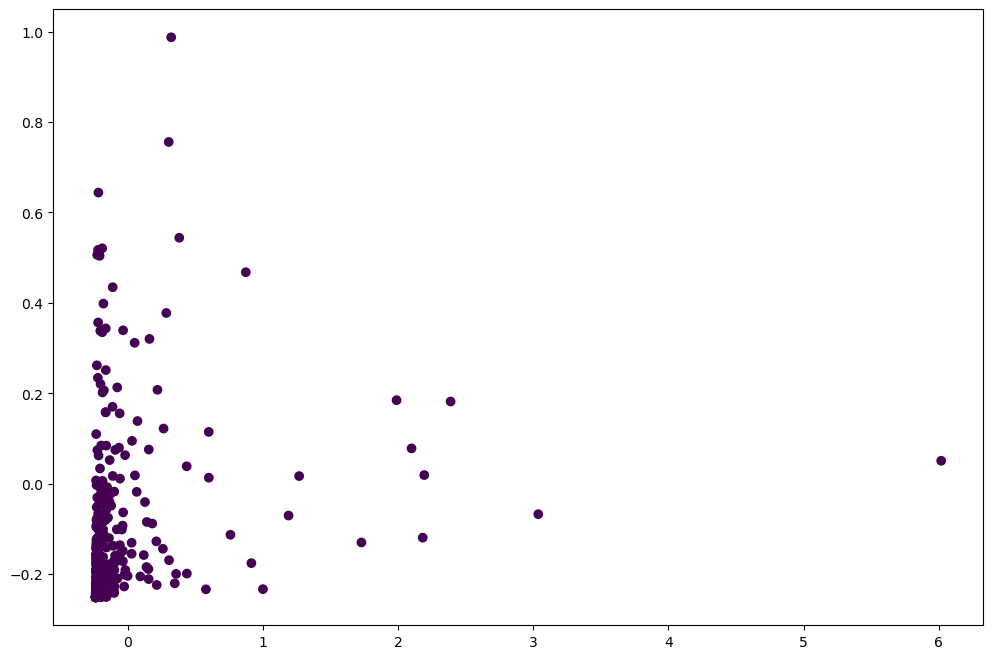

In [64]:
# Errores
errores_X_df = X_test[(y_test == 1) & (y_pred == 0)]
errores_y_df = y_test[(y_test == 1) & (y_pred == 0)]

plt.figure(figsize=(12, 8))
plt.scatter(errores_X_df["V5"], errores_X_df["V16"], c=errores_y_df)
plt.show()

OBJ
1    51
Name: count, dtype: int64


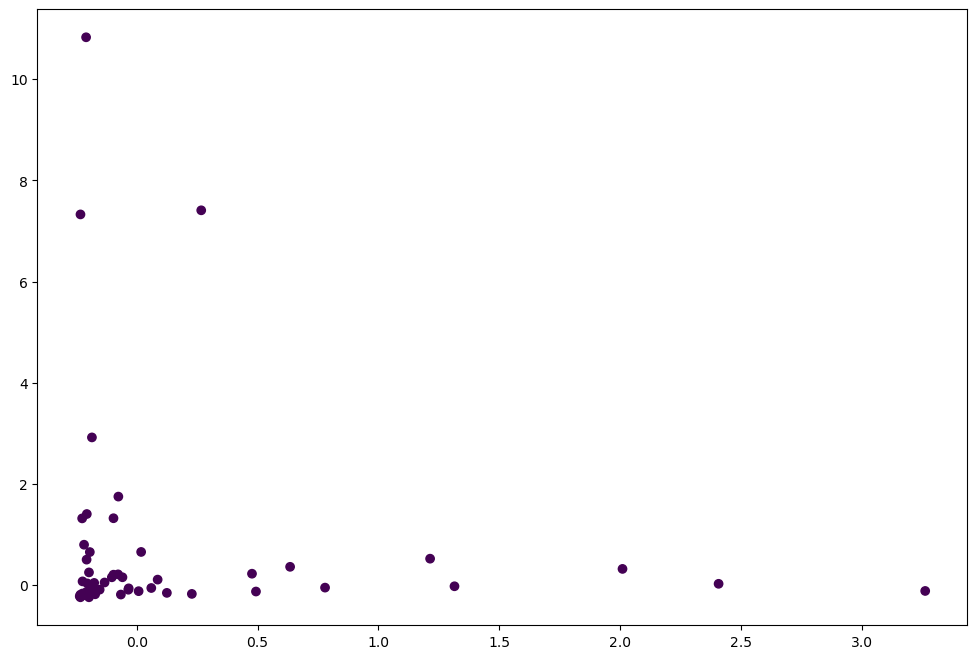

In [67]:
# Aciertos
aciertos_X_df = X_test[(y_test == 1) & (y_pred == 1)]
aciertos_y_df = y_test[(y_test == 1) & (y_pred == 1)]
print(aciertos_y_df.value_counts())

plt.figure(figsize=(12, 8))
plt.scatter(aciertos_X_df["V5"], aciertos_X_df["V16"], c=aciertos_y_df)
plt.show()